In [1]:
%%capture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mount Drive (can use ctrl+d if you have set up the shortcut)
from google.colab import drive
drive.mount('/content/drive')
ddir = 'drive/My Drive/ENPH259/Python_Introduction/'  # End with forward slash because it's a directory

Mounted at /content/drive


# **How to Load Data, Plot Data, and Compare Models**

# Loading/Inputing Data and Plotting

## Loading .csv Files

Lets stay you recorded the variables time and dist1 representing the time and distance of a ball accelerated by gravity and you have saved them in a data file called data.csv
* First copy the file (from canvas) into the folder you are working in
* Load the file with `pandas.read_csv()`



In [3]:
df = pd.read_csv(ddir+"data.csv")
df

,time,d
0,1.0,6
1,1.5,11
2,2.0,21
3,2.5,29
4,3.0,49
5,3.5,62
6,4.0,82


In [4]:
time = df['time']
dist = df['d']

## Plotting Data

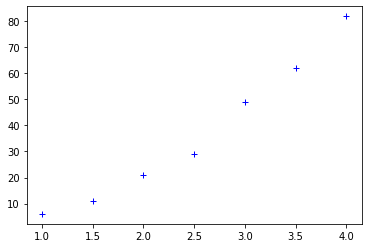

In [5]:
plt.plot(time, dist, 'b+')

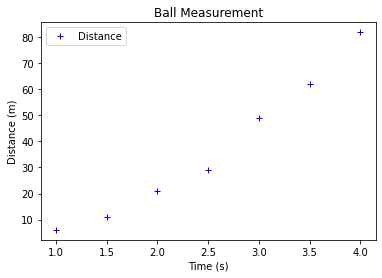

In [6]:
fig, ax = plt.subplots(1)
ax.plot(time, dist, 'b+', label='Distance')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Distance (m)')
ax.set_title('Ball Measurement')
ax.legend()

## Including Uncertainities

You need to estimate your uncertainies in your measurements and always plot your data with uncertainties. The above plot doesn't have that.
* Create a vector with the uncertainty in your distance measurement and plot it along with your data using the following:

Uncertainties: `[3, 2, 7, 8, 7, 12, 7]`

In [7]:
df['uncertainties'] = [3, 2, 7, 8, 7, 12, 7]
df  

,time,d,uncertainties
0,1.0,6,3
1,1.5,11,2
2,2.0,21,7
3,2.5,29,8
4,3.0,49,7
5,3.5,62,12
6,4.0,82,7


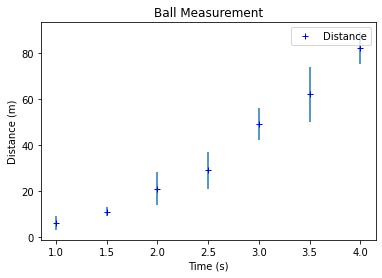

In [8]:
ax.errorbar(time, dist, df['uncertainties'], linestyle='')  # Note: this is plotting an error bar plot over the top of the previous plot
fig  # This makes it show up again

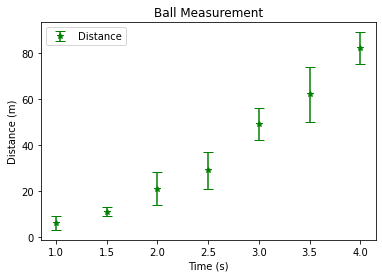

In [9]:
fig, ax = plt.subplots(1)
ax.errorbar(time, dist, df['uncertainties'], fmt='g*', capsize=5, label='Distance')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Distance (m)')
ax.set_title('Ball Measurement')
ax.legend()

# Comparing Data with Model/Theory

In nearly all of our labs we'll compare our measurements to some theory. In many cases you'll have a mathemtical model you'll want to compare with.
* Compare your results to an expected model of the ball’s behavior (with zero initial velocity) by plotting the expected distance vs time along with your data. What is the mathematical model here?

*Student work: Put equation here*
$$d=\frac{1}{2}gt^2$$

So what is g?
* g is what we are trying to fit with our model
* Does your model fit within the uncertainty of each point?
* Plot your model equation (with g = 10) on top of the previously plotted data

In [10]:
g = 10  # This is your guess of the acceleration constant

# Student work: Write your model equation here  (note `**` denotes an exponential)
d_theory1 = 0.5*g*time**2

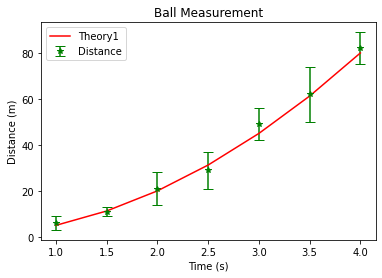

In [11]:
# Continuing from the plot we have above.
ax.plot(time, d_theory1, 'r-', label='Theory1')
ax.legend()
fig

If the model did not fit, we could try a different model or different starting parameters (g).

# Pre-lab #1 Work


For the second pre-lab question you are asked to plot this expression:

$$\frac{V_C(\omega)}{V_{in}}=\frac{1}{\sqrt{1+(\omega RC)^2}}$$

$\omega$ is the independed variable, so you need to create it:


In [ ]:
omega = np.linspace(1, 1e5, 1000)

Then define C and R; then input the formula and plot it.


# Curve Fitting

First we need to get a fitting package. We'll be using `lmfit`. Because it's not in a colab environment by default, we need to install it before importing it.

In [ ]:
%%capture out
!pip install lmfit   # Not installed on Colab virtual machine by default so we need to run a bash command to install it
import lmfit as lm   # Now it can be imported

In [ ]:
out.show()

     |████████████████████████████████| 266kB 2.9MB/s 
     |████████████████████████████████| 215kB 6.8MB/s 
     |████████████████████████████████| 256kB 8.0MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81991 sha256=cb5d6d15d040eb505e75c5ddacd4fcaf6611eaf898bffda357669ca901c918cd
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.19-cp36-none-any.whl size=17486 sha256=516bbec5ff5394da0bcfaf7d50742599f8490a4fa6aed5507d1adbdbb68dedf3
  Stored in directory: /root/.cache/pip/wheels/59/da/bf/62853db4291f1c5f91326e32e4d1766b8cfcccd1c0e6eaf53f
Successfully built lmfit asteval


Now define fitting function.

In [ ]:
def gfit(x, g):  # Define a function which returns y of model
  dist = 0.5*g*x**2
  return dist

Turn function into a model and specify your initial parameters.

In [ ]:
model = lm.Model(gfit)
params = lm.Parameters()
params.add('g', value=10, vary=True)  # vary=True means that the fitting function will vary g to best fit the data

Fit data with model.

In [ ]:
fit = model.fit(dist, x=time, params=params)
fit

What do you think about this fit? (Data isn't great since g_fit = 10.2)

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

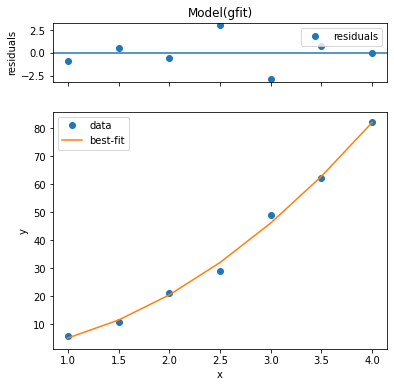

In [ ]:
fit.plot()  # This is nice to get a quick idea of what is going on, but DON'T use this in a lab as it has the wrong labels and no error bars

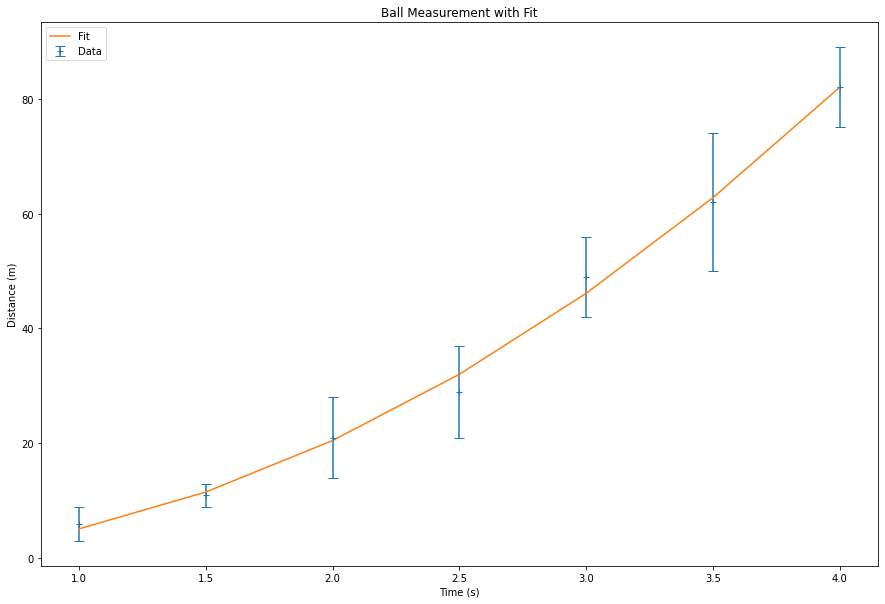

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax.errorbar(time, dist, df['uncertainties'], fmt='+', capsize=5, label='Data')
ax.plot(time, fit.best_fit, label='Fit')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Distance (m)')
ax.set_title('Ball Measurement with Fit')
ax.legend();
